# Trexquant Internship Kaggle Competition - Template Notebook

---
**<center>Welcome to the Trexquant Internship Kaggle Competition!</center>**

### Background 

Publicly traded US companies must report their earnings four times a year during what are known as **earnings announcement periods**. These periods often bring heightened scrutiny from investors, leading to increased stock returns. Stock prices can fluctuate dramatically around these announcements: if earnings are released before the market opens, prices may change significantly that day; if released after closing, the following day could see notable shifts. This creates unique opportunities for profit, as investors can capitalize on these stock price movements.

### Overview

In this challenge, you will use the provided features to **predict stock returns on earnings announcement days**. This involves both <u>feature engineering</u> and <u>machine learning modeling</u> to improve the accuracy of your predictions.

Use this notebook as a starting point for the Kaggle competition. The notebook includes examples of loading the provided data, conducting exploratory data analysis (EDA), creating and fitting a simple linear regression model, and generating predictions for submission. You are encouraged to build upon and enhance this baseline notebook.

---

## Imports

In [2]:
!ls /kaggle/input/interncompetitionnotebook

TQ_Test_Kaggle.csv  TQ_Train_Kaggle.csv


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

## Load Training Dataset
Load and review Training Dataset

---

## Table Documentation
### - Target

| Column Name | Description                          |
| ----------- | ------------------------------------ |
| **target**  | Stock return on earnings announcement days |

### - Features
**Note:** all feature columns are prefiex by a character `f`, for example: `f1, f2, ..., f87`.

| Column Name        | Description                                                                   | 
| ------------------ | ----------------------------------------------------------------------------- | 
| **f1** | Feature 1 | 
| **f2** | Feature 2 | 
| **f{i}** | Feature {i} |
| **f87** | Feature 87 |

In [4]:
import pandas as pd

# Load the training data
df_train = pd.read_csv("/kaggle/input/interncompetitionnotebook/TQ_Train_Kaggle.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df_train.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df_train.columns))

# Extract feature columns: columns that are prefixed with 'f'
feature_prefix = 'f'
feats = [col for col in df_train.columns if col.startswith(feature_prefix)]

# Display the number of feature columns and their names
print("\nNumber of feature columns:", len(feats))
print("\nFeature columns:\n", feats)

Shape of the training dataset: (105442, 89)

Columns in the training dataset:
 ['row_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'target']

Number of feature columns: 87

Feature columns:
 ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37',

---

## Exploratory Data Analysis

In this Exploratory Data Analysis (EDA) section, we aim to provide an initial overview of the dataset by calculating **key descriptive statistics** for each feature. 

We begin by loading the training dataset and extracting the feature columns. For each feature, we compute various statistics such as **count, mean, median, percentiles, and the number of positive, negative, and NaN values**. 

This process helps us understand the distribution and characteristics of the features, enabling us to identify potential patterns and anomalies in the data. The resulting statistics are displayed in a structured DataFrame for easy interpretation and further analysis.

In [5]:
# Function to get descriptive statistics for a given array
def get_descriptive_statistics(arr):
    # Total number of values in the array
    num_values = len(arr)
    
    # Count NaN values
    num_nan_values = np.isnan(arr).sum()
    
    # Filter finite and non-zero values
    finite_non_zero_values = arr[np.isfinite(arr) & (arr != 0)]
    num_finite_non_zero_values = len(finite_non_zero_values)
    
    # Count positive and negative values
    num_positive_values = (finite_non_zero_values > 0).sum()
    num_negative_values = (finite_non_zero_values < 0).sum()

    # Calculate descriptive statistics if there are finite non-zero values
    if num_finite_non_zero_values > 0:
        percentiles = np.percentile(finite_non_zero_values, [25, 50, 75])
        median = np.median(finite_non_zero_values)
        mean = np.mean(finite_non_zero_values)
        max_value = np.max(finite_non_zero_values)
        min_value = np.min(finite_non_zero_values)
    else:
        percentiles = [np.nan, np.nan, np.nan]
        median = np.nan
        mean = np.nan
        max_value = np.nan
        min_value = np.nan

    return {
        "count_of_values": num_values,
        "count_of_nan_values": num_nan_values,
        "count_finite_non_zero": num_finite_non_zero_values,
        "count_of_positive": num_positive_values,
        "count_of_negative": num_negative_values,
        "25th_percentile": percentiles[0],
        "50th_percentile": percentiles[1],
        "75th_percentile": percentiles[2],
        "mean": mean,
        "max": max_value,
        "min": min_value
    }

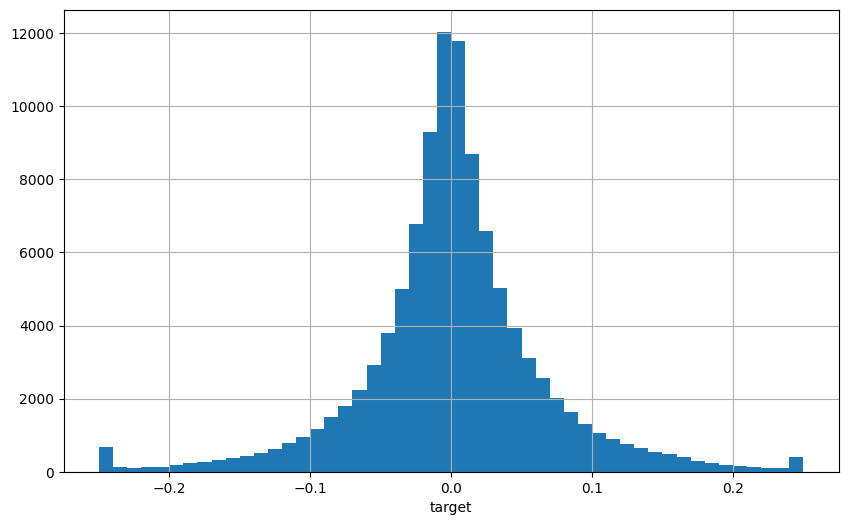

In [6]:
# Function to plot histogram of any column in the dataframe
%matplotlib inline
def hist_show(df, fname):
    df[fname].hist(bins=50,figsize=(10, 6))
    plt.xlabel(fname)
    plt.show()    
    return

# Distribution of the target
hist_show(df_train,'target')

In [7]:
# Initialize a list to record descriptive statistics for each feature
data_stats_recorder = []

# Calculate and record descriptive statistics for each feature
for f in feats:
    feat_array = np.array(df_train[f])
    data_stats = get_descriptive_statistics(feat_array)
    data_stats_recorder.append(data_stats)

# Convert the list of dictionaries to a DataFrame
df_data_stats = pd.DataFrame(data_stats_recorder, index=feats)

# Transpose the DataFrame for better readability
df_data_stats = df_data_stats.T

# Display the DataFrame of descriptive statistics
display(df_data_stats)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87
count_of_values,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00
count_of_nan_values,0.00,0.00,71288.00,0.00,0.00,0.00,76603.00,13061.00,0.00,0.00,0.00,44300.00,30968.00,18989.00,18939.00,13320.00,0.00,0.00,0.00,97357.00,37336.00,53868.00,17019.00,18674.00,16415.00,15075.00,15218.00,12987.00,56821.00,0.00,602.00,5584.00,0.00,7412.00,6659.00,17915.00,50124.00,97477.00,7691.00,75125.00,103469.00,11717.00,1245.00,41817.00,41796.00,81920.00,83046.00,18921.00,42741.00,0.00,16859.00,15951.00,6204.00,0.00,11536.00,80495.00,3212.00,0.00,11426.00,0.00,0.00,85710.00,67962.00,4438.00,3251.00,20448.00,0.00,0.00,20168.00,0.00,43633.00,15246.00,90871.00,172.00,17526.00,29299.00,13407.00,35.00,1.00,84017.00,45106.00,19370.00,14744.00,18592.00,11185.00,41953.00,0.00
count_finite_non_zero,105442.00,105442.00,34154.00,99578.00,90534.00,103494.00,28839.00,92381.00,105426.00,105442.00,105442.00,61142.00,74465.00,86453.00,86487.00,92122.00,105373.00,105442.00,105353.00,8085.00,68106.00,51574.00,88423.00,86768.00,89027.00,90367.00,90221.00,92455.00,47411.00,105234.00,104840.00,99858.00,18455.00,98000.00,98783.00,87527.00,55311.00,7965.00,97751.00,30317.00,1973.00,93708.00,104197.00,63625.00,63625.00,23522.00,22396.00,86521.00,62607.00,105282.00,88571.00,89491.00,99238.00,105442.00,93906.00,22447.00,102230.00,105442.00,94016.00,105442.00,105442.00,19732.00,29150.00,101004.00,102191.00,84910.00,83391.00,101406.00,85208.00,86558.00,61809.00,90139.00,14571.00,105226.00,87881.00,76103.00,91753.00,105407.00,105441.00,21425.00,60298.00,86022.00,90498.00,86850.00,94257.00,63489.00,105427.00
count_of_positive,47243.00,46250.00,17606.00,99578.00,90534.00,49719.00,13916.00,48282.00,50140.00,4475.00,15676.00,16411.00,32765.00,46203.00,55604.00,8588.00,52850.00,60649.00,52682.00,4018.00,29330.00,26797.00,26242.00,39890.00,19715.00,58169.00,45660.00,34615.00,22338.00,105234.00,44917.00,76220.00,18455.00,98000.00,84015.00,25338.00,319.00,3317.00,42949.00,13394.00,856.00,49077.00,44455.00,29404.00,32137.00,11655.00,10904.00,2833.00,62607.00,41554.00,88571.00,45144.00,47113.00,49127.00,47204.00,22447.00,51045.00,56627.00,46991.00,54467.00,75221.00,6563.00,29150.00,51688.00,49011.00,43296.00,41253.00,25662.00,85208.00,37189.00,33201.00,90139.00,2761.00,105226.00,87881.00,76103.00,44188.00,105407.00,50814.00,10817.00,60298.00,86022.00,90498.00,46360.00,40650.00,61073.00,57904.00
count_of_negative,58199.00,59192.00,16548.00,0.00,0.00,53775.00,14923.00,44099.00,55286.00,100967.00,89766.00,44731.00,41700.00,40250.00,30883.00,83534.00,52523.00,44793.00,52671.00,4067.00,38776.00,24777.00,62181.00,46878.00,69312.00,32198.00,44561.00,57840.00,25073.00,0.00,59923.00,23638.00,0.00,0.00,14768.00,62189.00,54992.00,4648.00,54802.00,16923.00,1117.00,44631.00,59742.00,34221.00,31488.00,11867.00,11492.00,83688.00,0.00,63728.00,0.00,44347.00,52

In [ ]:
# Initialize a list to store the histograms
histograms = []

# Loop through each feature in feats
for feature in feats:
    fig, ax = plt.subplots()
    df_train[feature].hist(ax=ax, bins=50)
    ax.set_title(f'Histogram of {feature}')
    histograms.append(fig)

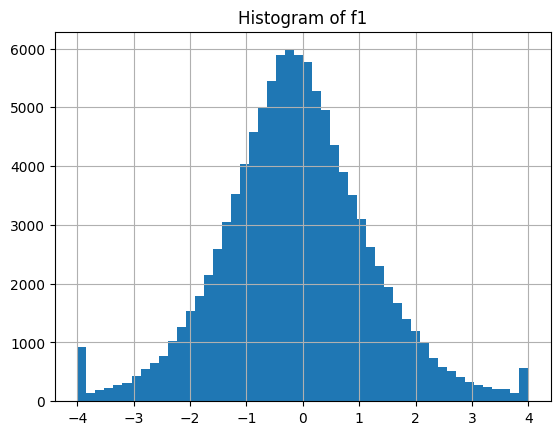

In [9]:
histograms[0]

In [10]:
# Create a new DataFrame to store the histograms
histogram_row = pd.DataFrame([histograms], columns=feats, index=['histogram'])

# Append the histogram row to the df_data_stats DataFrame
train_stats = pd.concat([df_data_stats, histogram_row])

In [17]:
train_stats.to_excel("train_stats.xlsx", index=True)

---

## Pre-Processing

In this section, we load the training dataset and prepare it for model training by **extracting feature columns and handling missing values**. We replace NaN values in both the feature matrix and the target vector with zeros, ensuring the data is clean and ready for the machine learning pipeline.

In [8]:
# Prepare the feature matrix X and the target vector Y
X_train = df_train[feats].to_numpy()
Y_train = df_train['target'].to_numpy()

# Display the shapes of X and Y matrices
print("X_train.shape:", X_train.shape, "\nY_train.shape:", Y_train.shape)

# Pre-processing functions to fill NaN values with zero
def process_X(X_inp):
    """
    Function to process the feature matrix X by replacing NaN values with zero.
    """
    out_X_inp = np.nan_to_num(X_inp)
    return out_X_inp

def process_Y(Y_inp):
    """
    Function to process the target vector Y by replacing NaN values with zero.
    """
    out_Y_inp = np.nan_to_num(Y_inp)
    return out_Y_inp

# Apply pre-processing to the training dataset
X_train = process_X(X_train)
Y_train = process_Y(Y_train)

X_train.shape: (105442, 87) 
Y_train.shape: (105442,)


---

## Model Training

In this step, we **train a simple linear regression model using the training data**. The model is fitted to predict stock returns based on the provided features. After training, we compute the Mean Squared Error (MSE) on the training set as a measure of the model's accuracy in predicting target values.

In [9]:
# Initialize and fit the linear regression model
reg = LinearRegression().fit(X_train, Y_train)

# Predict target values using the trained model
Y_train_pred = reg.predict(X_train)

# Calculate Mean Squared Error (MSE) for in-sample evaluation
mse_in_sample = mean_squared_error(Y_train, Y_train_pred)
print("MSE_In_Sample:", mse_in_sample)

MSE_In_Sample: 0.0042796961970788675


---

## Out-of-Sample Prediction

In this step, we **use the trained linear regression model to make predictions on the test dataset**. We preprocess the test features to handle any NaN values and then apply the model to predict the target values (stock returns) for the test data. These predictions are generated for submission to the Kaggle competition, where they will be evaluated against the true outcomes to assess the model's performance on unseen data.

In [10]:
# Load Test Dataset
df_test = pd.read_csv("/kaggle/input/interncompetitionnotebook/TQ_Test_Kaggle.csv")
print("df_test.shape:", df_test.shape)

print("\nTest Dataset columns:\n",list(df_test.columns))

# Prepare X_test matrix
X_test = df_test[feats].to_numpy()

# Apply Pre-Processing on Test Dataset
X_test = process_X(X_test)

# Predict Y_test_pred using the trained linear regression model
Y_test_pred = reg.predict(X_test)

print("\nGenerating Predictions: Success")

df_test.shape: (85821, 88)

Test Dataset columns:
 ['row_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87']

Generating Predictions: Success


---

## Output File Generation

In this final step, we format and save the predictions for the test dataset into a CSV file named `predictions.csv`. This file should be submitted to Kaggle for evaluation. The predictions include `row_id`, which identifies each row in the test dataset, and `target`, which contains the predicted values (stock returns) generated by our trained linear regression model.

In [11]:
# Create DataFrame for predictions
df_output = pd.DataFrame({"row_id": np.array(df_test['row_id']), 'target': Y_test_pred})

# Define filename for saving predictions
filename = "/kaggle/working/predictions_linear_reg_0_impute.csv"

# Save predictions to CSV file
df_output.to_csv(filename, index=False)

print(f"Successfully Saved in File: {filename}")
print('\nParticipants can download "predictions.csv" and upload it using the "Submit Prediction" button on the competition page.')

# Display the first 10 rows of predictions DataFrame
print("\nFirst few rows of saved predictions:")
display(df_output.head(n=10))

Successfully Saved in File: /kaggle/working/predictions_linear_reg_0_impute.csv

Participants can download "predictions.csv" and upload it using the "Submit Prediction" button on the competition page.

First few rows of saved predictions:


,row_id,target
0,44,0.01
1,45,0.01
2,46,-0.00
3,47,0.00
4,48,-0.00
5,49,-0.00
6,50,0.00
7,51,0.00
8,52,-0.01
9,53,-0.00
